           README.md File  description  PULL_REQUEST_TEMPLATES.md File   
ecosystem                                                                
maven           98.849372    95.606695                       21.548117  \
npm            100.000000    99.182840                       25.434116   
pypi           100.000000    95.073892                       35.960591   
rubygems        99.882353    97.647059                       37.176471   

           CONTRIBUTING.md File  LICENSE File  CODE_OF_CONDUCT.md File  
ecosystem                                                               
maven                 45.606695     89.644351                35.774059  
npm                   50.970378     97.344229                38.304392  
pypi                  56.157635     99.261084                43.349754  
rubygems              57.411765     97.058824                48.000000  


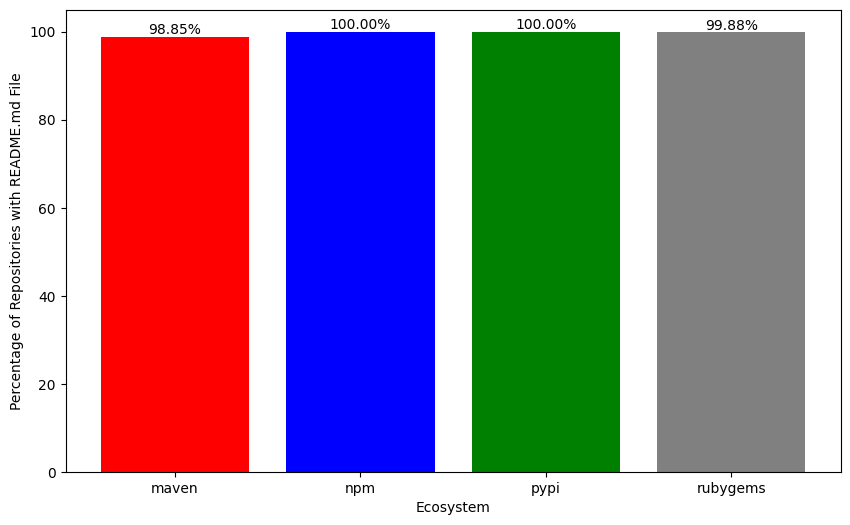

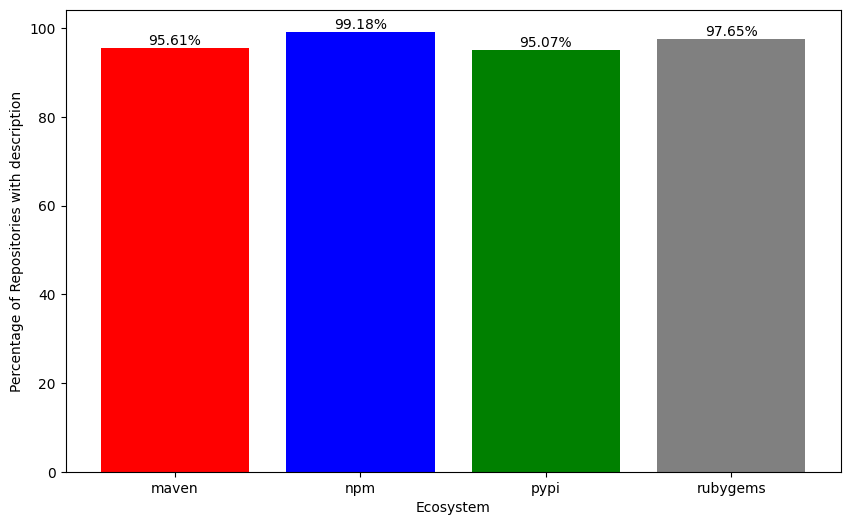

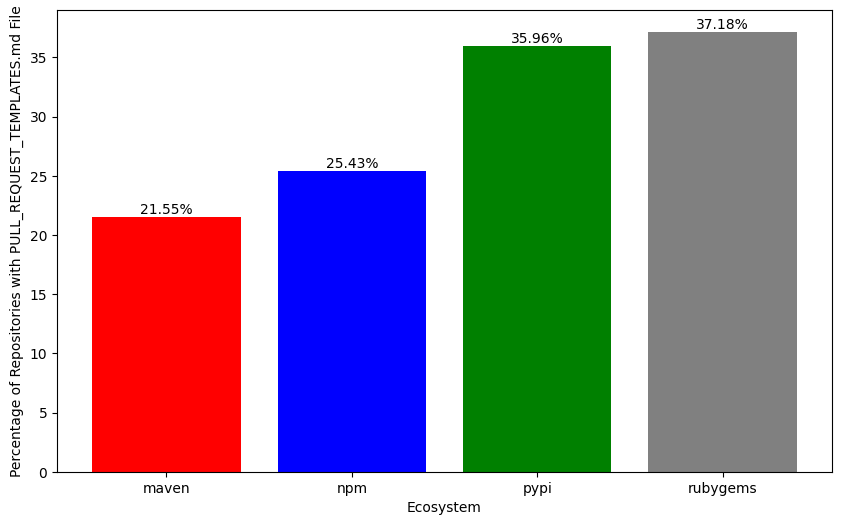

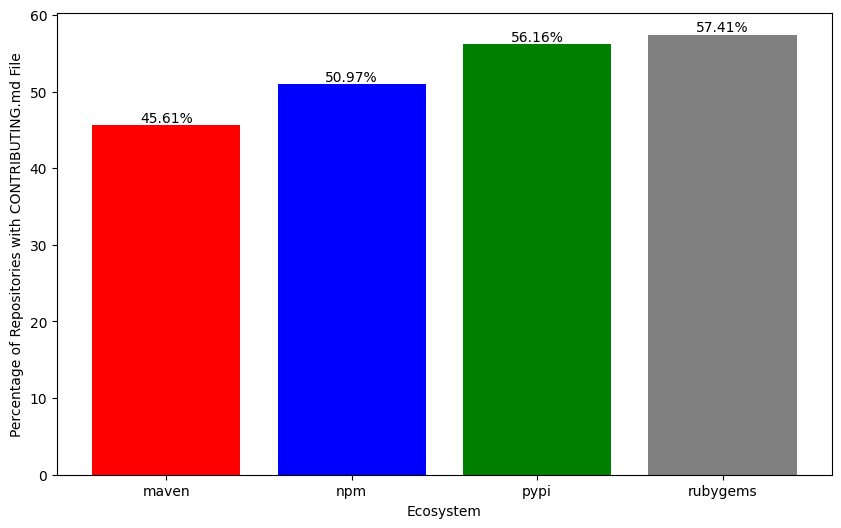

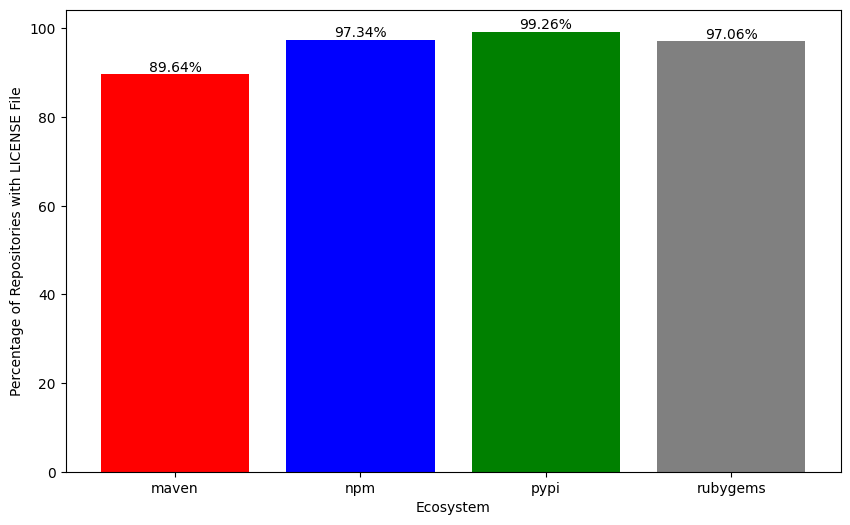

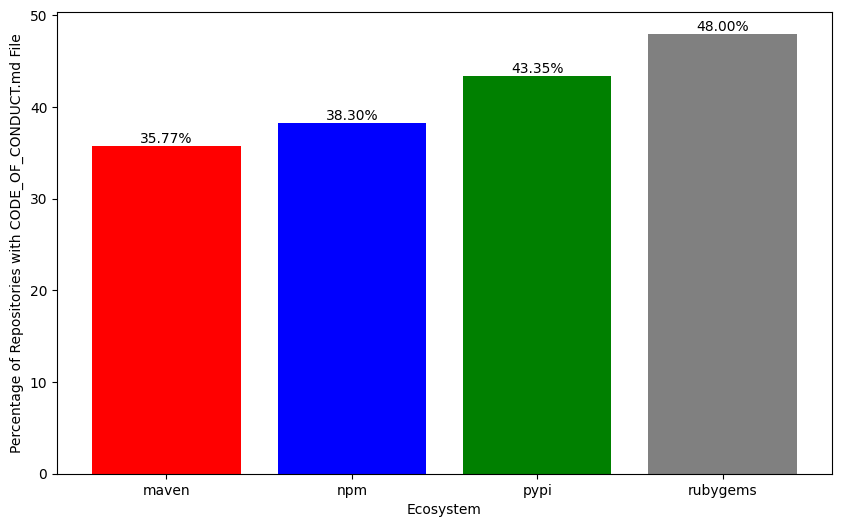

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('community_standards_records.csv')

# Rename columns
df = df.rename(columns={
    'readme': 'README.md File',
    'code_of_conduct': 'CODE_OF_CONDUCT.md File',
    'contributing': 'CONTRIBUTING.md File',
    'license': 'LICENSE File',
    'pull_request_template': 'PULL_REQUEST_TEMPLATES.md File'
})

filtered_df = df[df['health_percentage'] != 0]
filtered_df.describe()

boolean_columns = ['README.md File', 'description', 'PULL_REQUEST_TEMPLATES.md File', 'CONTRIBUTING.md File', 'LICENSE File', 'CODE_OF_CONDUCT.md File']
percentage_by_ecosystem = filtered_df.groupby('ecosystem')[boolean_columns].mean() * 100
print(percentage_by_ecosystem)

for metric in boolean_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
    bars = plt.bar(percentage_by_ecosystem.index, percentage_by_ecosystem[metric], color=['red', 'blue', 'green', 'gray'])
    plt.xlabel('Ecosystem')
    plt.ylabel(f'Percentage of Repositories with {metric}')
    
    # Add values inside the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
    plt.show()


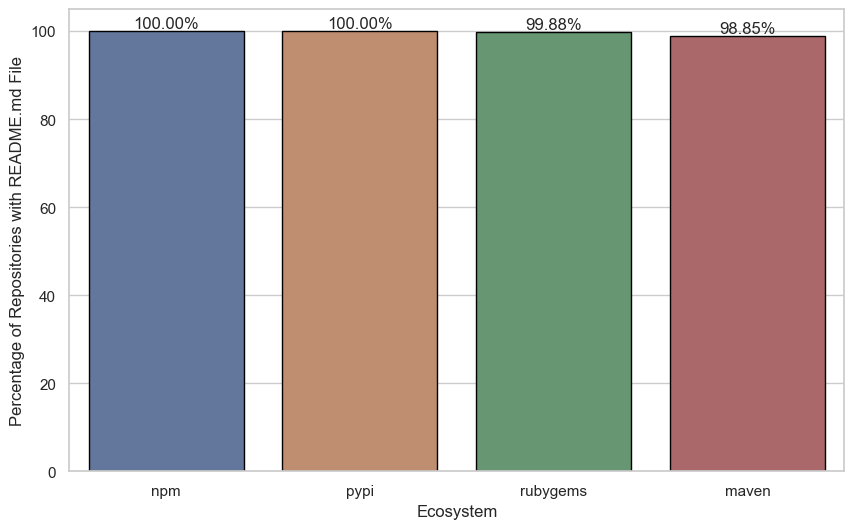

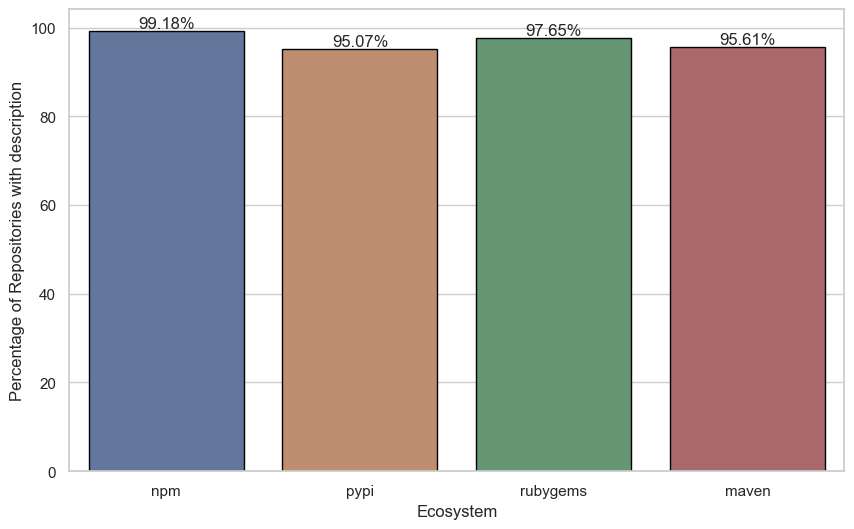

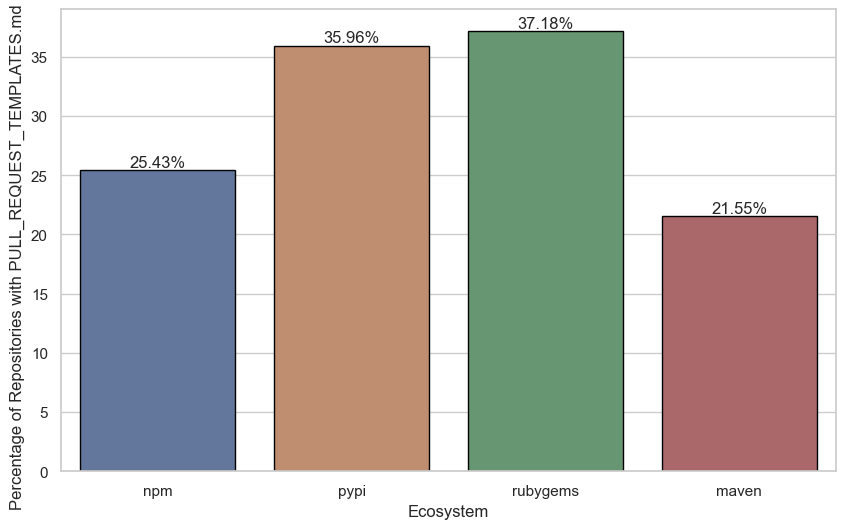

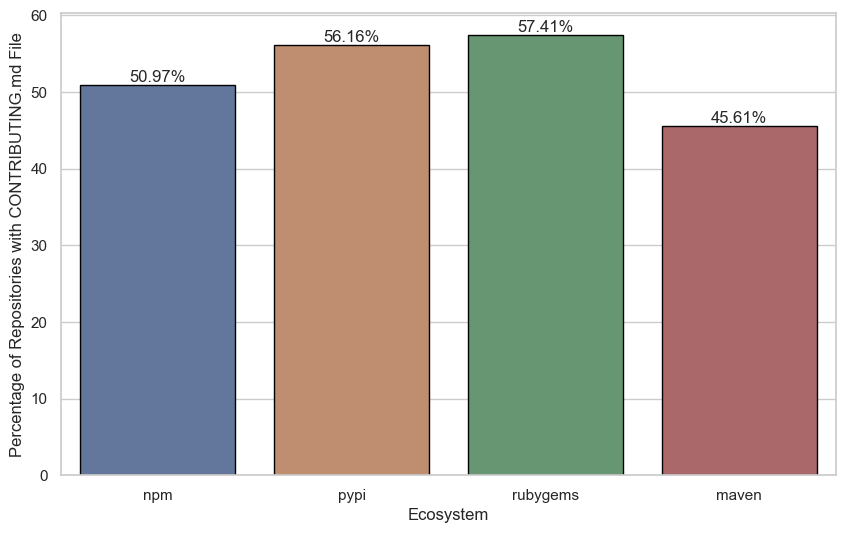

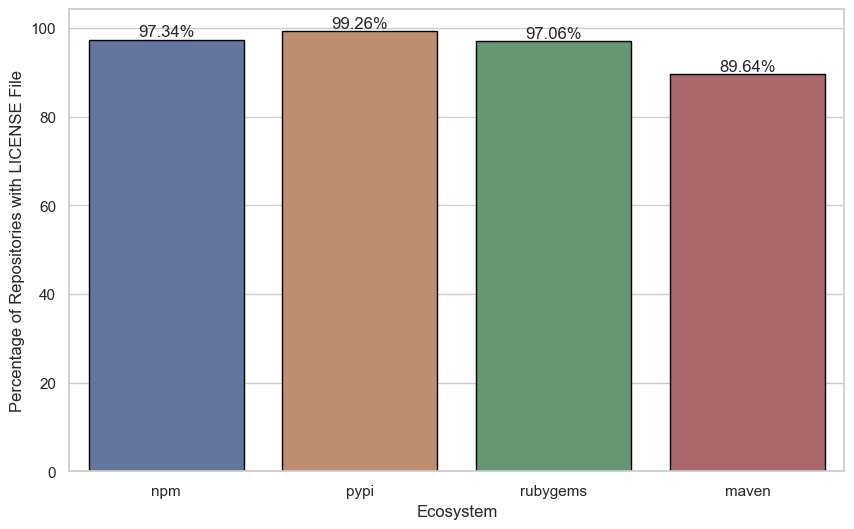

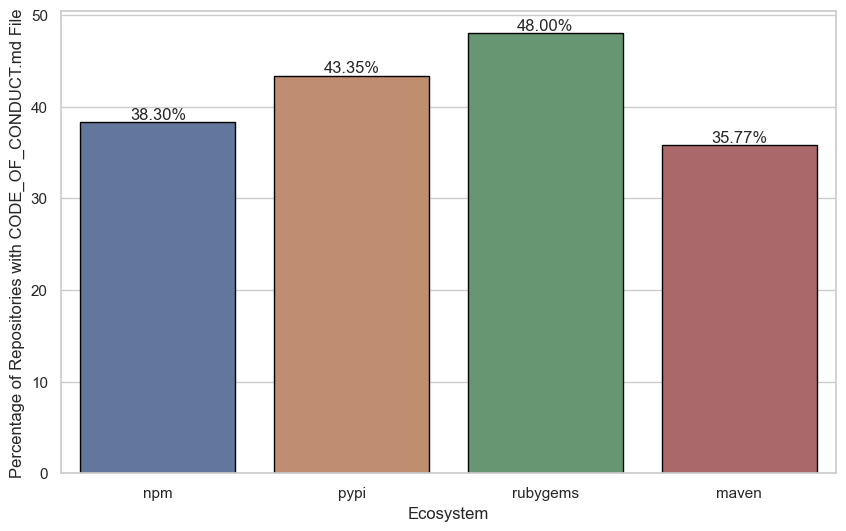

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('community_standards_records.csv')

# Rename columns
df = df.rename(columns={
    'readme': 'README.md File',
    'code_of_conduct': 'CODE_OF_CONDUCT.md File',
    'contributing': 'CONTRIBUTING.md File',
    'license': 'LICENSE File',
    'pull_request_template': 'PULL_REQUEST_TEMPLATES.md File'
})

filtered_df = df[df['health_percentage'] != 0]

boolean_columns = ['README.md File', 'description', 'PULL_REQUEST_TEMPLATES.md File', 'CONTRIBUTING.md File', 'LICENSE File', 'CODE_OF_CONDUCT.md File']
percentage_by_ecosystem = filtered_df.groupby('ecosystem')[boolean_columns].mean() * 100

# Define custom order for 'ecosystem'
custom_order = ['npm', 'pypi', 'rubygems', 'maven']

# Define custom colors for each ecosystem
custom_colors = ['#5975a4', '#cc8963', '#5f9e6e', '#b55d60']

# Set seaborn style and palette
sns.set(style="whitegrid")
sns.set_palette(custom_colors)

# Plotting
for metric in boolean_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
    ax = sns.barplot(x=percentage_by_ecosystem.index, y=metric, data=percentage_by_ecosystem, order=custom_order, edgecolor='black')
    ax.set_xlabel('Ecosystem')
    ax.set_ylabel(f'Percentage of Repositories with {metric}')

    # Add values inside the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.show()
